<a href="https://colab.research.google.com/github/FJWangYantao/FJWangYantao.github.io/blob/main/Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)#仅保留训练数据中前10000个最长出现的单词

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index() #word_index是一个字典，能将单词映射为整数索引
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])#交换字典和键的值，将整数索引映射为单词
#解码评论，因为0,1，2分贝时填充、序列开始、未知词保留的索引
decoded_review=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))#创建一个形状为(len(sequences),dimension)的零矩阵
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.#将results[i]的某些值初始化为1
  return results
#测试数据与训练数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")#标签向量化
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(32,activation="tanh"),
    layers.Dense(32,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])#构建模型

In [ ]:
model.compile(optimizer="rmsprop",
        loss="mse",
        metrics=["accuracy"])#编译模型

In [ ]:
x_val = x_train[:10000]
pratial_x_train = x_train[10000:]
y_val = y_train[:10000]
pratial_y_train = y_train[10000:]
#划分训练集与验证集

In [ ]:
history = model.fit(
    pratial_x_train,
    pratial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val,y_val)
)
#fit方法选择模型参数

Epoch 1/4
30/30 [==============================] - 4s 114ms/step - loss: 0.1738 - accuracy: 0.7523 - val_loss: 0.1125 - val_accuracy: 0.8663
Epoch 2/4
30/30 [==============================] - 1s 50ms/step - loss: 0.0939 - accuracy: 0.8854 - val_loss: 0.1021 - val_accuracy: 0.8618
Epoch 3/4
30/30 [==============================] - 1s 49ms/step - loss: 0.0697 - accuracy: 0.9157 - val_loss: 0.0857 - val_accuracy: 0.8851
Epoch 4/4
30/30 [==============================] - 2s 55ms/step - loss: 0.0588 - accuracy: 0.9275 - val_loss: 0.0878 - val_accuracy: 0.8794


In [ ]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.0925 - accuracy: 0.8727


In [ ]:
model.predict(x_test)
#预测

782/782 [==============================] - 4s 3ms/step


array([[7.6458273e-03],
       [9.9999577e-01],
       [4.4466293e-01],
       ...,
       [5.8526348e-04],
       [9.8927151e-03],
       [9.8399615e-01]], dtype=float32)

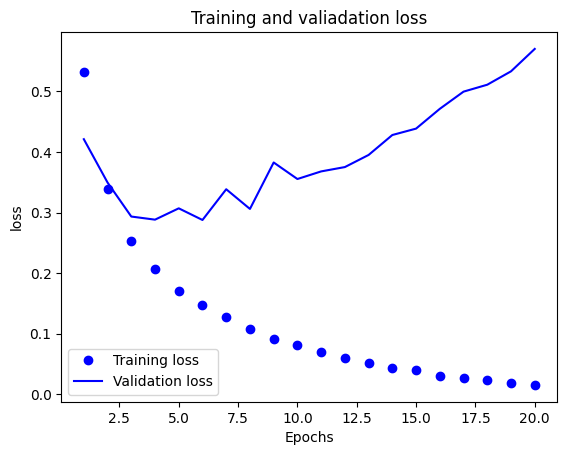

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training loss")
plt.plot(epochs,val_loss_values,"b",label="Validation loss")
plt.title("Training and valiadation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
#画损失值图

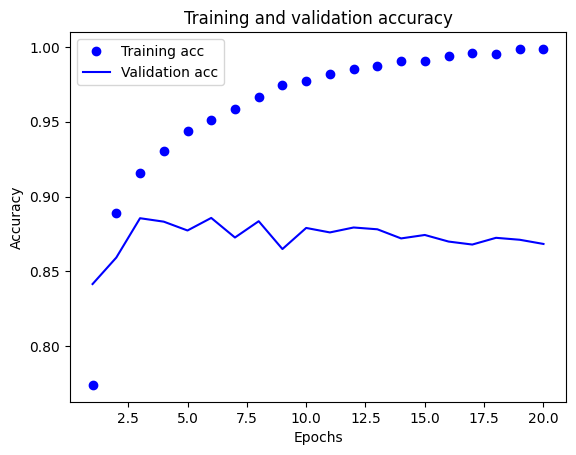

In [ ]:
plt.clf()
acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#画精确率图